 Project 1:  India Premier League (IPL)
 Using the IPL Complete Dataset (2008-2020) Which contains the match
 descriptions, results, winners, player of the matches, ball by ball dataset
 and much more. Do the following:
 Expectations.
 • Import the required libraries
 • Perform Exploratory Data Analysis
 • Data visualization
 • Data Standardization
 • IPL win probability using suitable ML algorithm
 • Win probability for 2021 from existing data

##Import the necessary libraries

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score






##Load the dataset

In [214]:
IPL_Matches=pd.read_csv('IPL Matches 2008-2020.csv')

In [215]:
IPL_Matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


##Exploratory Data Analysis (EDA)

In [216]:
##checking missing values
IPL_Matches.isnull().sum()

,0
id,0
city,13
date,0
player_of_match,4
venue,0
neutral_venue,0
team1,0
team2,0
toss_winner,0
toss_decision,0


Handling the missing values

In [217]:
## handling the missing values using "ffill" and "bfill" method
IPL_Matches.fillna(method='ffill', inplace=True)
IPL_Matches.fillna(method='bfill', inplace=True)

<ipython-input-217-d1d922ce78d0>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  IPL_Matches.fillna(method='ffill', inplace=True)
<ipython-input-217-d1d922ce78d0>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  IPL_Matches.fillna(method='bfill', inplace=True)


In [218]:
print(IPL_Matches.isnull().sum())

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
dtype: int64


In [219]:
##displaying the basic match info
IPL_Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             816 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  816 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           816 non-null    object 
 11  result           816 non-null    object 
 12  result_margin    816 non-null    float64
 13  eliminator       816 non-null    object 
 14  method           816 non-null    object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [220]:
###Checking data unique values
IPL_Matches.nunique()

,0
id,816
city,32
date,596
player_of_match,233
venue,36
neutral_venue,2
team1,15
team2,15
toss_winner,15
toss_decision,2


In [221]:
##checkking statistical summary
IPL_Matches.describe().T

,count,mean,std,min,25%,50%,75%,max
id,816.0,756349.553922,305894.254804,335982.0,501227.75,729298.0,1082626.25,1237181.0
neutral_venue,816.0,0.094363,0.292512,0.0,0.00,0.0,0.00,1.0
result_margin,816.0,17.468137,22.215707,1.0,6.00,8.0,20.00,146.0


In [222]:
##dropping the id column
IPL_Matches.drop('id', axis=1, inplace=True)

In [223]:
IPL_Matches.head()

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,D/L,Asad Rauf,RE Koertzen
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,D/L,MR Benson,SL Shastri
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,D/L,Aleem Dar,GA Pratapkumar
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,D/L,SJ Davis,DJ Harper
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,D/L,BF Bowden,K Hariharan


Convert date column to datetime and extract season year

In [224]:
##converting the datetime
IPL_Matches['date'] = pd.to_datetime(IPL_Matches['date'])

In [225]:
##converting the extract season year
IPL_Matches['season'] = IPL_Matches['date'].dt.year

In [226]:
IPL_Matches.head()

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,D/L,Asad Rauf,RE Koertzen,2008
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,D/L,MR Benson,SL Shastri,2008
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,D/L,Aleem Dar,GA Pratapkumar,2008
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,D/L,SJ Davis,DJ Harper,2008
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,D/L,BF Bowden,K Hariharan,2008


In [227]:
# Show head of date and season columns
print(IPL_Matches[['date', 'season']].head())


        date  season
0 2008-04-18    2008
1 2008-04-19    2008
2 2008-04-19    2008
3 2008-04-20    2008
4 2008-04-20    2008


##Data Visualization

IPL matches from 2008 to 2020

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: count, dtype: int64


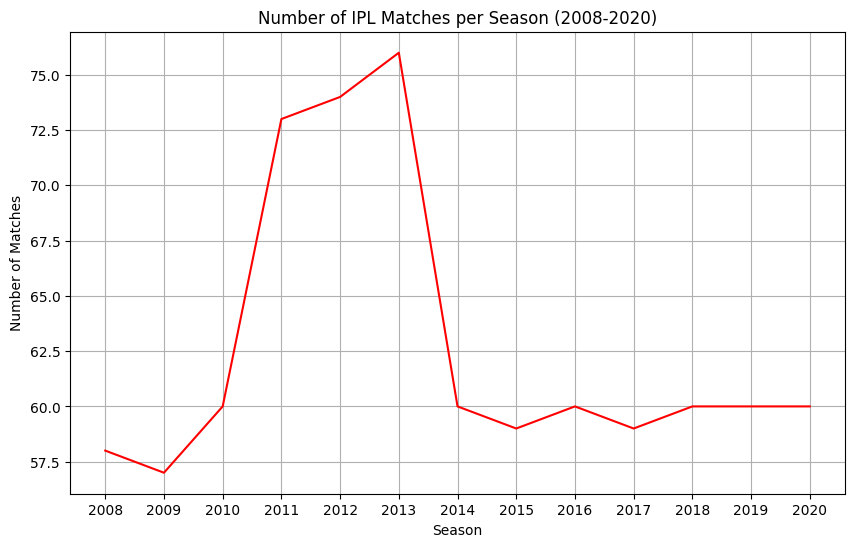

In [228]:
# Analyzing number of matches per season and visualizing them
def compute_and_plot_matches_per_season(dataframe):
    # Count matches per season
    matches_count = dataframe['season'].value_counts().sort_index()
    print(matches_count)
    # Plot line chart
    plt.figure(figsize=(10, 6))
    plt.plot(matches_count.index, matches_count.values,color="red")
    plt.title('Number of IPL Matches per Season (2008-2020)')
    plt.xlabel('Season')
    plt.ylabel('Number of Matches')
    plt.grid(True)
    plt.xticks(matches_count.index)
    plt.show()

compute_and_plot_matches_per_season(IPL_Matches)

Toss decision distribution

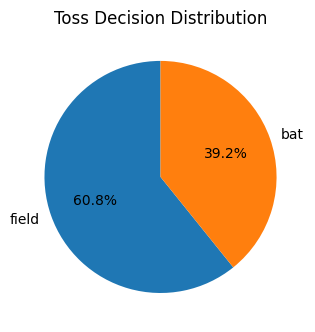

In [229]:
plt.subplot(1, 2, 2)
toss_decision_counts = IPL_Matches['toss_decision'].value_counts()
plt.pie(toss_decision_counts.values, labels=toss_decision_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Toss Decision Distribution')

plt.tight_layout()
plt.show()

Top 10 Venues by number of matches

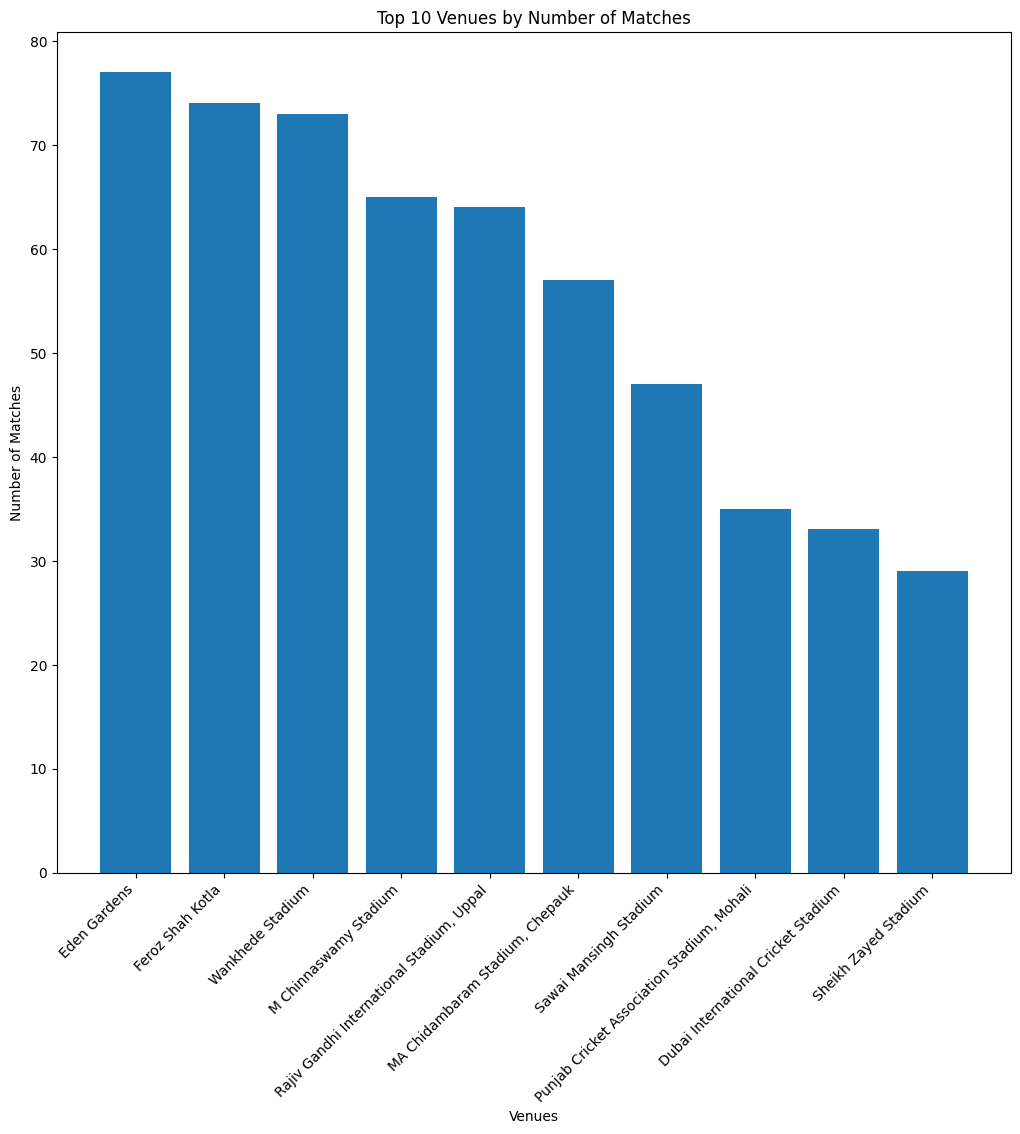

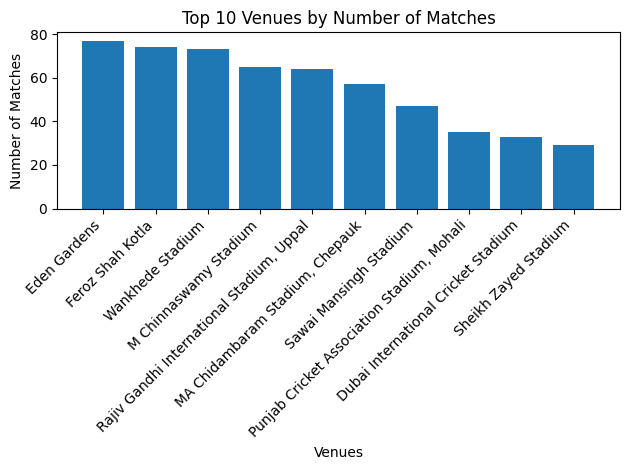

In [230]:
# Venue with most matches
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 3)
top_venues = IPL_Matches['venue'].value_counts().head(10)
plt.bar(range(len(top_venues)), top_venues.values)
plt.title('Top 10 Venues by Number of Matches')
plt.xlabel('Venues')
plt.ylabel('Number of Matches')
plt.xticks(range(len(top_venues)), top_venues.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.bar(range(len(top_venues)), top_venues.values)
plt.title('Top 10 Venues by Number of Matches')
plt.xlabel('Venues')
plt.ylabel('Number of Matches')
plt.xticks(range(len(top_venues)), top_venues.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

Result type distribution

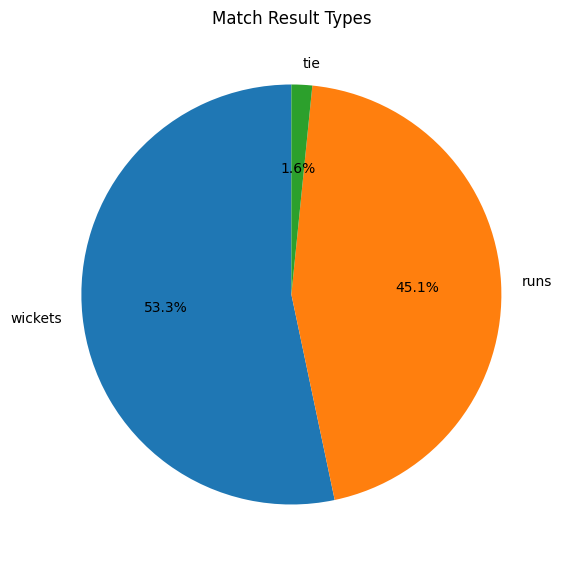

In [231]:
# Result type distribution
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 2)
result_counts = IPL_Matches['result'].value_counts()
plt.pie(result_counts.values, labels=result_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Match Result Types')
plt.show()

Total wins by a team(2008-2020)

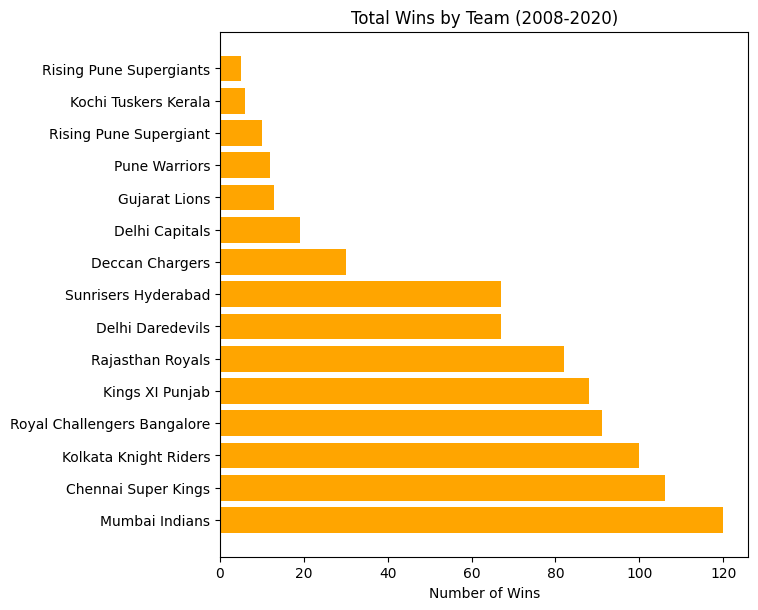

In [232]:
# Wins by team
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
wins_by_team = IPL_Matches['winner'].value_counts()
plt.barh(wins_by_team.index, wins_by_team.values,color="orange")
plt.title('Total Wins by Team (2008-2020)')
plt.xlabel('Number of Wins')
plt.show()

##Data standardazation

In [233]:
features = ['team1', 'team2', 'toss_winner', 'toss_decision']

In [234]:
X=IPL_Matches[features]
y=IPL_Matches['winner']

Split data

In [235]:
##split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize

In [236]:
##Identify categorical columns to encode
categorical_cols = ['team1', 'team2', 'toss_winner', 'toss_decision']

In [237]:
## Apply Label Encoding to categorical columns in X_train and X_test
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    X_test[col] = label_encoders[col].transform(X_test[col])

In [238]:
 ##scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Train the model

In [239]:
RM=RandomForestClassifier(n_estimators=100,random_state=42)

In [240]:
##fitting the model
RM.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

##Make predictions

In [241]:
##making the predictions
y_pred=RM.predict(X_test_scaled)

In [242]:
# Probability of team1 winning
probability_team1_wins = RM.predict_proba(X_test_scaled)[:, 1]

In [243]:
print(probability_team1_wins)

[0.         0.15416667 0.         0.         0.         0.
 0.02513636 0.         0.         0.         0.         0.
 0.         0.43       0.01       0.         0.85       0.
 0.         0.         0.0605     0.         0.         0.
 0.         0.         0.         0.04       0.         0.
 0.         0.         0.         0.         0.3825     0.
 0.         0.         0.         0.         0.13666667 0.
 0.         0.02       0.51       0.26       0.         0.3165
 0.00833333 0.         0.         0.         0.         0.
 0.         0.         0.         0.03       0.         0.
 0.         0.         0.         0.004      0.         0.01
 0.         0.         0.         0.         0.01966667 0.
 0.         0.         0.         0.05133333 0.0025     0.71
 0.01       0.03       0.         0.01       0.         0.
 0.         0.         0.         0.02       0.41666667 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00833333 0.         0. 

In [248]:
## win probability of 2021 according to the data
win_probability = RM.predict_proba(X_test_scaled)

In [249]:
print(win_probability)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01433333 0.15416667 0.04       ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.21816667 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.958     ]
 [0.         0.         0.         ... 0.         0.30787884 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


##Calculating metrics

In [244]:
##checking accuracy of the model
accuracy=RM.score(X_test_scaled,y_test)


In [245]:
print("Accuracy:",accuracy)

Accuracy: 0.5060975609756098


In [246]:
##checking precision of the model

precision=precision_score(y_test,y_pred,average='weighted')


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [247]:
print(precision)

0.5373976480836237
